# Question 1: Decision Trees for Regression

# The dataset petrol_consumption.csvPreview the document file is taken from FSU dataset repository (http://people.sc.fsu.edu/~jburkardt/datasets/regression/x16.txt (Links to an external site.)).

# For this dataset, use Decision Trees to try and predict gas consumption (in millions of gallons) in 48 US states based upon gas tax (in cents), per capita income (dollars), paved highways (in miles) and the proportion of the population with a driver license.

# Use Decision Trees to build a regressor for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on the appropriate metrics.


# we shall solve this problem in the following manner 
# 1) eda and data engineering
# 2) model building
# 3) best model


# 1) eda and data engineering

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import warnings

In [2]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [3]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


* Summary:
    * The average petrol_tax is 7.6 cents and minimum of 5 and maximum of 10 cents
    * The average per capita income income is  4241(dollars) with std  3491(dollars)
    * The minimum length of paved highways is 431 miles and average is 5565 miles
    * The population_Driver_licence has a average of 0.57% 
    * The average Petrol consumption is 576.7 millions of gallons with std of 111.8 millions of gallons

In [4]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [5]:
df.shape

(48, 5)

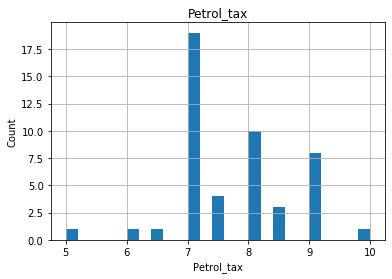

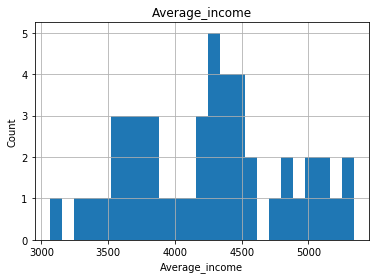

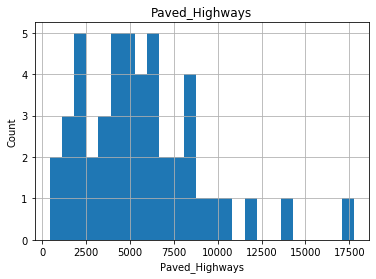

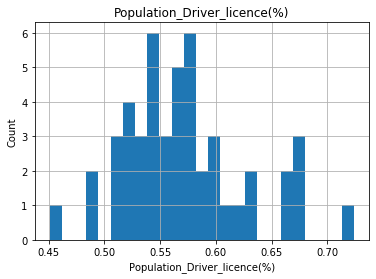

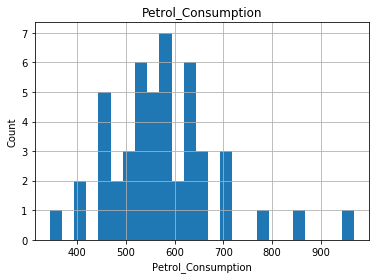

In [6]:
for feature in df.columns:
    
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop("Petrol_Consumption",axis=1),df['Petrol_Consumption'],test_size=0.2,random_state=123)
X_train.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
1,9.00,4092,1250,0.572
6,8.00,5319,11868,0.451
27,7.50,3846,9061,0.579
35,6.58,3802,7834,0.629
12,7.00,4817,6930,0.574


In [8]:
Y_train.head()

1     524
6     344
27    631
35    644
12    525
Name: Petrol_Consumption, dtype: int64

# 2) model building
## 2.1)normal decision tree for regression

In [9]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()  
tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

* Criterion : Evaluation criteria ( default for regressor: mse (Mean-square error)
* max_depth : The maximum allowed depth of the tree (default None)
* max_Features : The maximum number of Features that are evaluated for splitting at each node (by default =None)
* max_leaf_nodes : Maximum number of leaf nodes
* min_sample_split : The minimum number of samples a node must have before it can be split(defalt:2)
* min_samples_leaf : The minimum number of samples a leaf node must have (default 1)

In [10]:
predictions = tree.predict(X_test)
predictions[:5]

array([704., 704., 574., 704., 464.])

In [11]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

In [12]:
from sklearn.metrics import mean_absolute_error, r2_score
me=mean_absolute_error(Y_test, predictions)
me

138.9

In [13]:
pe=r2_score(Y_test, predictions)
pe

0.037211404425458894

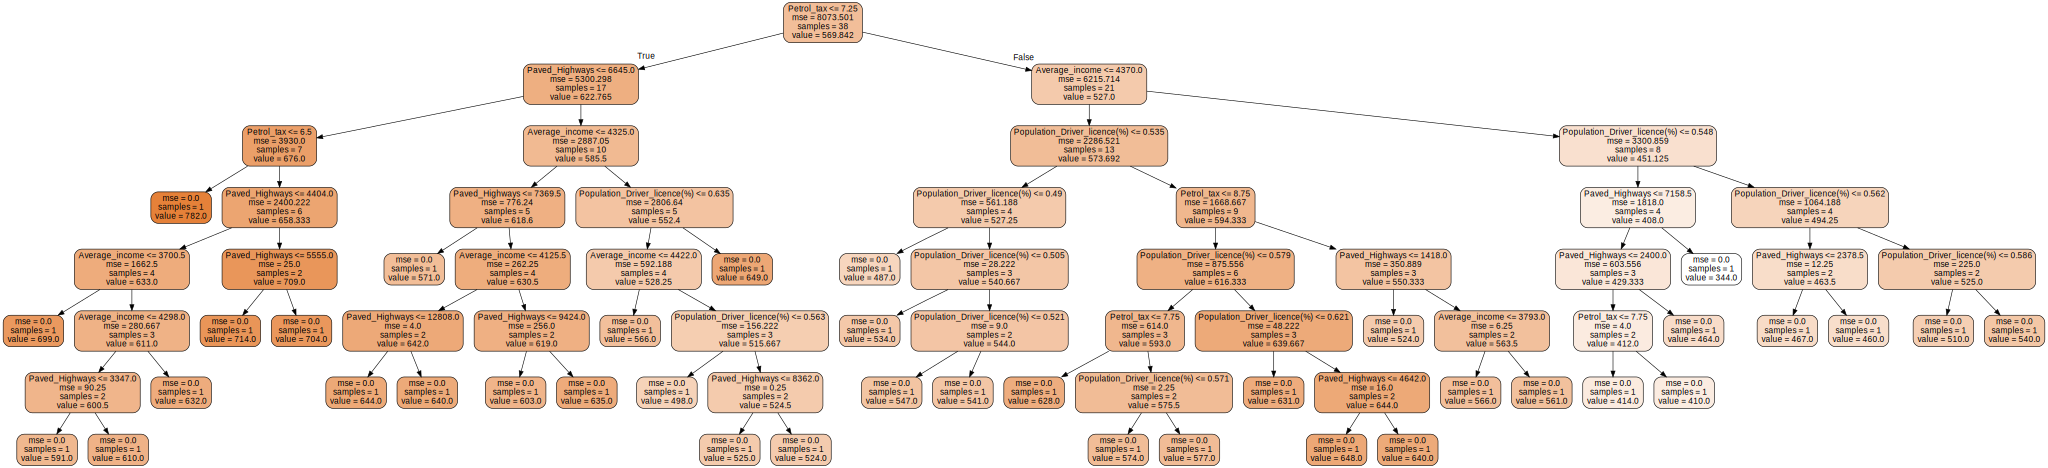

In [14]:
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns,out_file=None)
import graphviz
graphviz.Source(dot_data)

* we did not mentioned any hyper-parameters in the decision tree so it is recursively grown 
* Splitting predictor and Cuttof point : In this decision tree, The splitting predictor is Petrol_Tax and Cutting value is 7.25 cents
* root node is Petrol_Tax
* mse : Evolution metrics for this particular region is mse=8073.501
* samples : Number of observations in this particular region is 38
* value : The value for the predictions for this region is 569.842
     * Next, the decison tree splits into 2 internal nodes Paved_Highways if Petrol_Tax <=7.25 and Average_Income if Petrol_Tax >7.25
      * Furtherly, the decison tree splits into many internal nodes and it is unstoppable bacause of not having any hyperparameters to stop the decision tree to grow from recursively
      * There are many leaf nodes in the tree where each observation belongs to one region based on the average mean or mode of the observations present in that particular region
The regions are formed so that the RSS is minimumWe see that on the terminal nodes (i.e. leaves) the model outputs one of the seven values for all the predictions. We can also confirm this with the below code by looking at the predicted unique values.

We see that on the terminal nodes (i.e. leaves) the model outputs one of the seven values for all the predictions. We can also confirm this with the below code by looking at the predicted unique values.

In [15]:
np.unique(predictions)

array([344., 464., 510., 574., 632., 704., 714.])

## 2.2) desicion tree for regression using grid search cv 

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"max_depth":[2,3,4,None], "max_features":[1,2,3,4,None]}]
gs = GridSearchCV(estimator=DecisionTreeRegressor(random_state=123), param_grid=param_grid,cv=10)
gs.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=123,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 3, 4, None],
                          'max_features': [1, 2, 3, 4, None]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             sco

In [17]:
gs.cv_results_['params']


[{'max_depth': 2, 'max_features': 1},
 {'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': None},
 {'max_depth': 3, 'max_features': 1},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 4, 'max_features': 1},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': None, 'max_features': 1},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': None}]

In [18]:
gs.best_params_

{'max_depth': 2, 'max_features': 2}

In [19]:
gs.cv_results_['rank_test_score']

array([ 2,  1,  5, 11, 11,  3,  4, 10, 17, 17, 14, 20,  9,  6,  6, 19, 13,
        8, 15, 15])

In [20]:
gs.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=2,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

In [21]:
predictions1 = gs.predict(X_test)
predictions1[:5]

array([612.8125    , 612.8125    , 573.69230769, 612.8125    ,
       451.125     ])

In [22]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

In [23]:
me1=mean_absolute_error(Y_test, predictions1)

In [24]:
pe1=r2_score(Y_test, predictions1)

In [25]:
tree1 = DecisionTreeRegressor(max_depth=2,max_features=2)
tree1.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=2,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [26]:
predictions2 = tree1.predict(X_test)
predictions2[:5]

array([599.8       , 575.44444444, 575.44444444, 575.44444444,
       436.71428571])

In [27]:
Y_test[:5]

18    865
13    508
26    577
31    554
10    580
Name: Petrol_Consumption, dtype: int64

In [28]:
me2=mean_absolute_error(Y_test, predictions2)
me2

108.43015873015872

In [29]:
pe2=r2_score(Y_test, predictions2)
pe2

0.06926655436826779

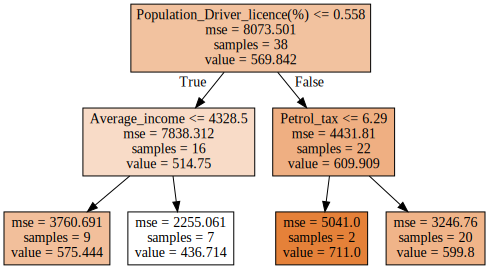

In [30]:
dot_data = export_graphviz(tree1, filled=True, feature_names=X_train.columns, out_file=None)
graphviz.Source(dot_data)

1) Splitting predictor and Cuttof point : In this decision tree, The splitting predictor is Petrol_Tax and Cutting value is 7.25 cents
* root node is Petrol_Tax
* mse : Evolution metrics for this particular region is mse=8073.501
* samples : Number of observations in this particular region is 38
* value : The value for the predictions for this region is 569.842
2) Next, the decison tree splits into 2 internal nodes Population_Driver_licence(%)<=0.667 if Petrol_Tax <=7.25 and Population_Driver_licennce(%)<=0.575 if Petrol_Tax >7.25
* Internal nodes are Population_Driver_licence(%)<=0.667 and Population_Driver_licennce(%)<=0.575
* mse : Evolution metrics for this particular regions are mse=5300.298 and mse=6215.714 respectively
* samples : Number of observations in this particular regions are 17 and 21 respectively
* value : The value for the predictions for this region is 622.765 and 6215 respectively
3) Furtherly, the decison tree splits into 4 internal nodes ,each observation in the dataset belongs to one of the 4 regions based on the average mean or mode value of the observations present in that particular region
4) The regions are formed so that the RSS is minimum

# 3)best model

In [31]:
Best_Model =pd.DataFrame({'Model':['normal dt','dt with grid search'],
             'R2_Score':[pe.round(3),pe2.round(3)],
            'mean errror':[me.round(3),me2.round(3)],
             })
Best_Model_df = Best_Model.sort_values(by='R2_Score', ascending=False)
Best_Model_df = Best_Model_df.set_index('Model')
Best_Model_df

,R2_Score,mean errror
Model,,
dt with grid search,0.069,108.43
normal dt,0.037,138.90


# Question 2: Decision Trees for Classification

# The bill_authentication.csvPreview the document file is taken from UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/banknote+authentication (Links to an external site.)).

# Use this dataset to predict whether a bank note is authentic or fake depending upon the four different attributes of the image of the note. The attributes are Variance of wavelet transformed image, curtosis of the image, entropy, and skewness of the image.

# Use Decision Trees to build a classifier for the give data. Use Grid Search to find the optimal value for the hyperparameters, and evaluate your model on suitable metrics. Use graphviz to visualize your decision tree.

# we shall solve the it in the follwing manner 
# 1) eda and data engineering
# 2) model building
# 3) best model

##  1) eda and data engineering

In [32]:
df2 = pd.read_csv("bill_authentication.csv")
df2.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## 2)model building
## normal desicion tree for classification

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df2.drop("Class",axis=1),df2['Class'],test_size=0.2,random_state=123)
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,Y_train)
predictions = tree.predict(X_test)
predictions[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [34]:
Y_test[:5]

657     0
18      0
700     0
221     0
1219    1
Name: Class, dtype: int64

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix
ae=accuracy_score(Y_test, predictions)


In [36]:
ee=accuracy_score(Y_test, predictions, normalize=False)

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Authenticate','Fake'], columns=['Authenticate','Fake'])
confusion_df

,Authenticate,Fake
Authenticate,147,0
Fake,1,127


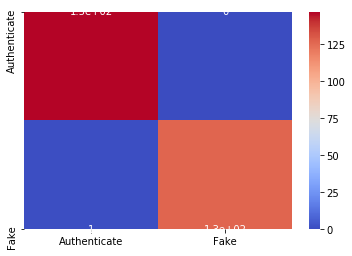

In [38]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

* The original number of Aunthenticate Notes are 147 and predicted number of Authenticate notes are 148 (so False positive is 1)
* The original number of Fake notes are 128 and the predicted number of Fake notes are 127 (so False Negative is 1)
* True positives are 147
* True negatives are 127

In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       147
           1       1.00      0.99      1.00       128

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



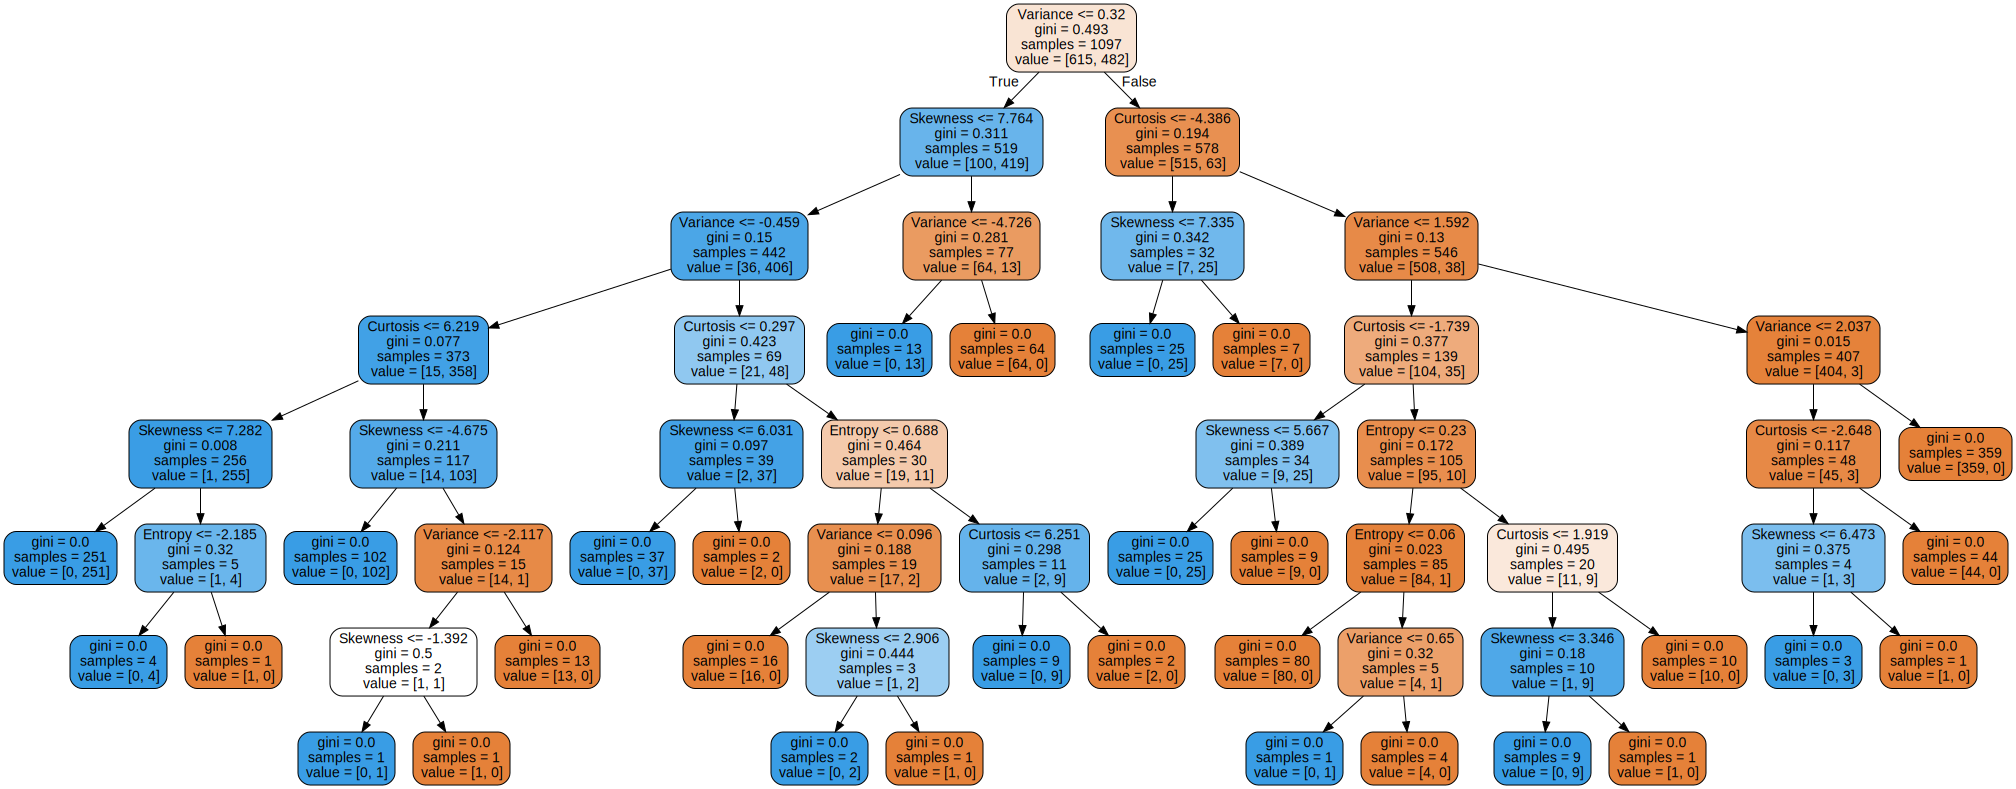

In [40]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(tree, filled=True, rounded=True, feature_names=X_train.columns,out_file=None)
graphviz.Source(dot_data)

## 2.2) desicion trees with gridsearch cv

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = [{"max_depth":[2,3,4,None], "max_features":[2,3,4,None]}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=123),\
                 param_grid = param_grid,\
                 cv=10)
gs.fit(X_train, Y_train)
gs.cv_results_['params']

[{'max_depth': 2, 'max_features': 2},
 {'max_depth': 2, 'max_features': 3},
 {'max_depth': 2, 'max_features': 4},
 {'max_depth': 2, 'max_features': None},
 {'max_depth': 3, 'max_features': 2},
 {'max_depth': 3, 'max_features': 3},
 {'max_depth': 3, 'max_features': 4},
 {'max_depth': 3, 'max_features': None},
 {'max_depth': 4, 'max_features': 2},
 {'max_depth': 4, 'max_features': 3},
 {'max_depth': 4, 'max_features': 4},
 {'max_depth': 4, 'max_features': None},
 {'max_depth': None, 'max_features': 2},
 {'max_depth': None, 'max_features': 3},
 {'max_depth': None, 'max_features': 4},
 {'max_depth': None, 'max_features': None}]

In [42]:
gs.best_params_

{'max_depth': None, 'max_features': 2}

In [43]:
gs.cv_results_['rank_test_score']

array([16, 13, 13, 13, 12,  9,  9,  9,  7,  8,  5,  5,  1,  4,  1,  1])

In [44]:
gs.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=123, splitter='best')

In [45]:
predictions = gs.predict(X_test)
accuracy_score(Y_test, predictions)

0.9890909090909091

In [46]:
accuracy_score(Y_test, predictions, normalize=False)

272

In [47]:
confusion_mat = confusion_matrix(Y_test, predictions)
confusion_df = pd.DataFrame(confusion_mat, index=['Authenticate','Fake'], columns=['Authenticate','Fake'])
confusion_df

,Authenticate,Fake
Authenticate,146,1
Fake,2,126


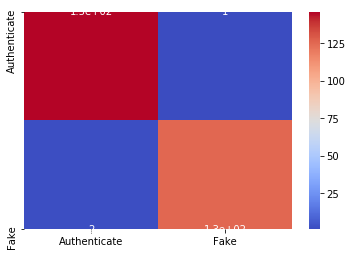

In [48]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

* The original number of Aunthenticate Notes are 147 and predicted number of Authenticate notes are 148 (so False positive is 1)
* The original number of Fake notes are 128 and the predicted number of Fake notes are 127 (so False Negative is 1)
* True positives are 147
* True negatives are 127

In [49]:
tree2 = DecisionTreeClassifier(max_depth=None, max_features=2)
tree2.fit(X_train, Y_train)
predictions2 = tree2.predict(X_test)
predictions2[:5]

array([0, 0, 0, 0, 1], dtype=int64)

In [50]:
Y_test[:5]

657     0
18      0
700     0
221     0
1219    1
Name: Class, dtype: int64

In [51]:
ae1=accuracy_score(Y_test, predictions2)

In [52]:
ee1=accuracy_score(Y_test, predictions2, normalize=False)

In [53]:
confusion_mat = confusion_matrix(Y_test, predictions2)
confusion_df = pd.DataFrame(confusion_mat, index=['Authenticate','Fake'], columns=['Authenticate','Fake'])
confusion_df

,Authenticate,Fake
Authenticate,146,1
Fake,4,124


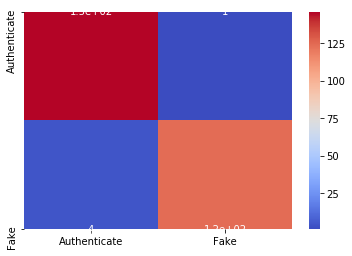

In [54]:
_=sns.heatmap(confusion_df, cmap='coolwarm', annot=True)

* The original number of Aunthenticate Notes are 147 and predicted number of Authenticate notes are 148 (so False positive is 1)
* The original number of Fake notes are 128 and the predicted number of Fake notes are 127 (so False Negative is 1)
* True positives are 147
* True negatives are 127
* Recall is improved

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       147
           1       0.99      0.97      0.98       128

    accuracy                           0.98       275
   macro avg       0.98      0.98      0.98       275
weighted avg       0.98      0.98      0.98       275



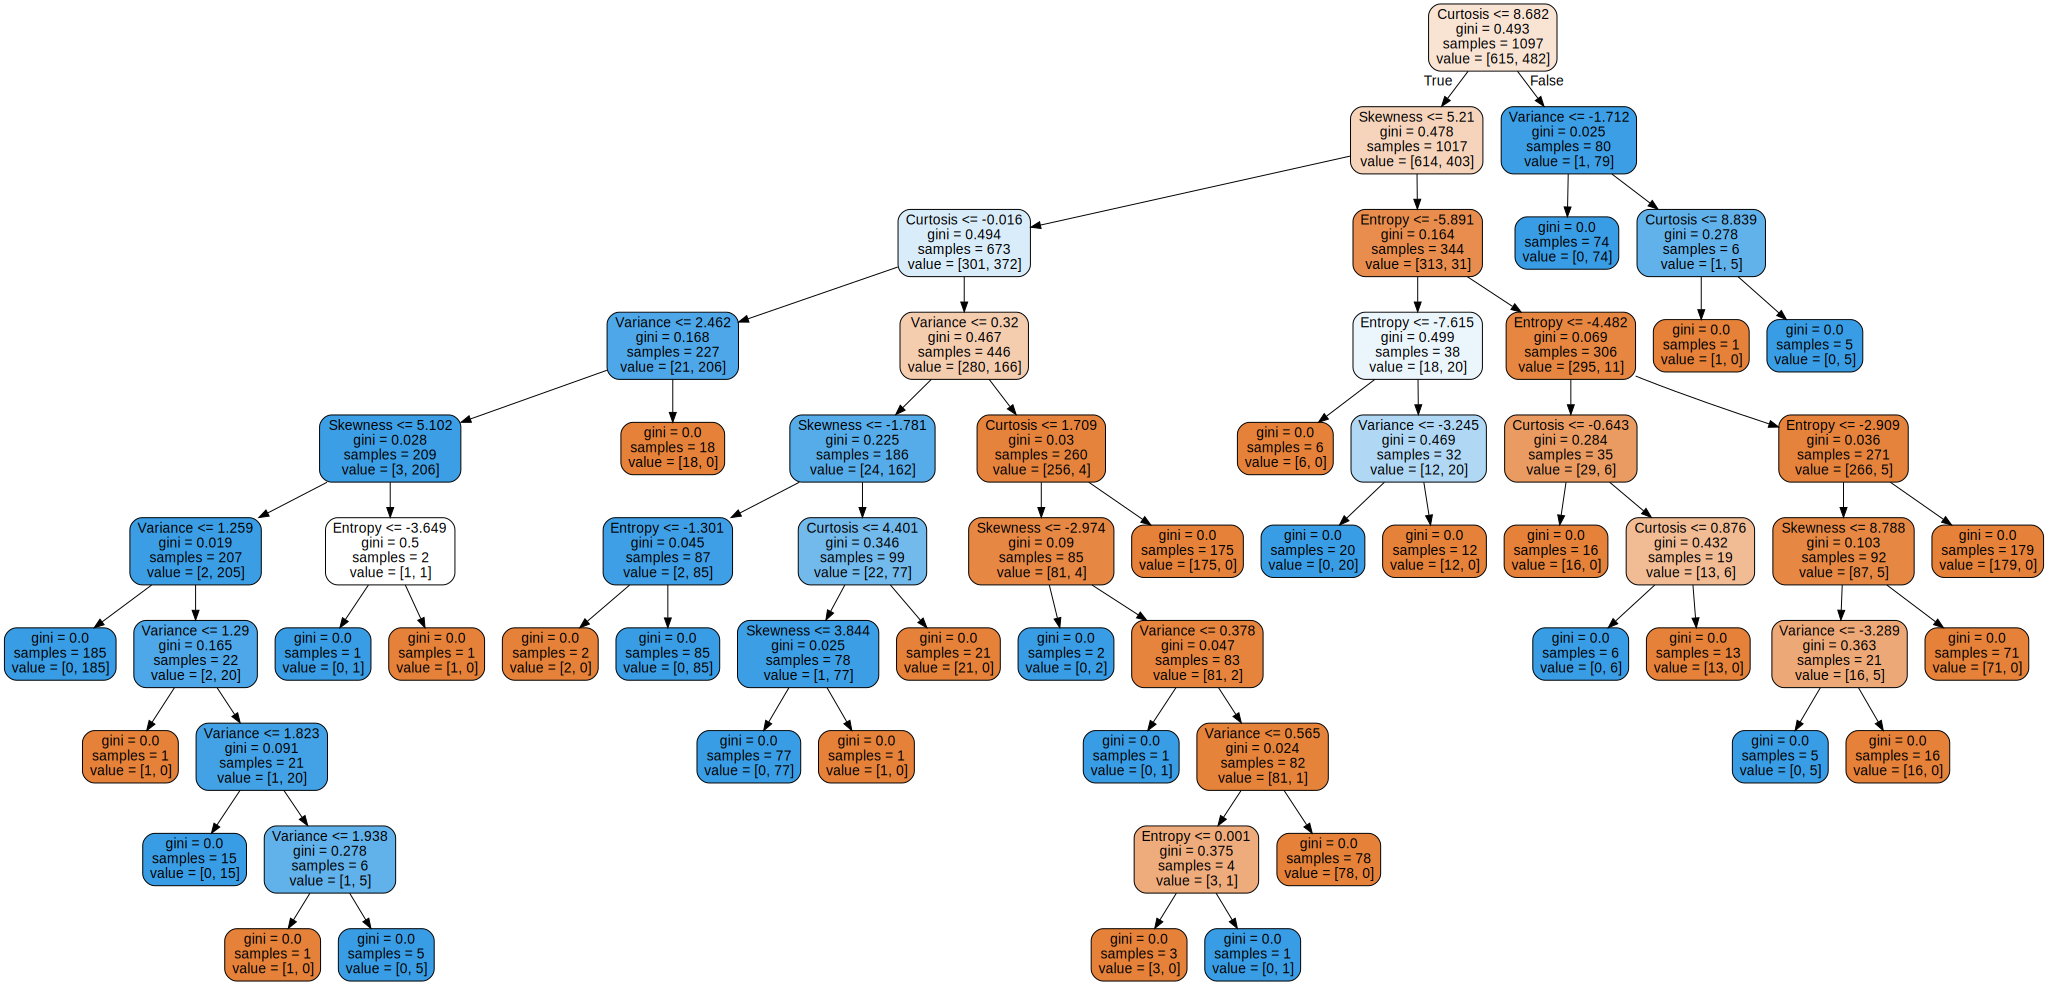

In [56]:
dot_data = export_graphviz(tree2, filled=True, rounded=True, feature_names=X_train.columns, out_file=None)
graphviz.Source(dot_data)

1) Splitting predictor and Cuttof point : In this decision tree, The splitting predictor is Skewness and Cutting value is 5.096

* root node is Skewness
* gini : Evolution metrics for this particular region is 0.493
* samples : Number of observations in this particular region is 1097
* value : The value for the predictions for this region is [615,482] that is 615 observations belongs to 0 class and 482 observations belongs to 1 class
2) Next, the decison tree splits into 2 internal nodes Variance<=1.259 if Skewness<=5.096 and Variance<=-3.369 if Skewness >5.096
* Internal nodes are Variance<=1.259 and Variance<=-3.369
* gini : Evolution metrics for this particular regions are gini=0.48 and gini=0.168 respectively
* samples : Number of observations in this particular regions are 750 and 347 respectively
* value : The value for the predictions for this region is [300,450] and [315,32] respectively
3) Furtherly, the decison tree splits into many internal nodes
4) many leaf nodes are formed and each observation in the dataset belongs to one of the 2 classes either class 0 (Autheticated note) or class 1 (Fake note) 
* as shown in the decision tree , In the leaf nodes the numbe rof observations belongs to each class is shown

# 3) best model

In [57]:
Best_Model1 =pd.DataFrame({'Model':['normal dt','dt with grid search'],
             'accuracy':[ae.round(3),ae1.round(3)],
            'accuracy without normalizing':[ee.round(3),ee1.round(3)],
             })
Best_Model_df1 = Best_Model1.sort_values(by='accuracy', ascending=False)
Best_Model_df1 = Best_Model_df1.set_index('Model')
Best_Model_df1

,accuracy,accuracy without normalizing
Model,,
normal dt,0.996,274
dt with grid search,0.982,270
